In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

This document will investigate the distribution of the means of samples taken from a population. At the beginning, if we just take 1000 samples from the data and plot it as a histogram we see that it is very spread out. If we take a sample of 5, take the mean of this sample of 5 and then repeat this process 1000 times we see the plot be more clustered together. If we do the same but this time take a sample of 20 then the plot is even more centered and normally distributed. We can also see at the bottom that the more samples you take in the process, the closer you get to the true mean.  

In [3]:
loans_income = pd.read_csv('loans_income.csv')

In [4]:
loans_income.head(5)

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [5]:
sample_data = pd.DataFrame({
    'income': loans_income['x'].sample(1000),
    'type': 'data'
})

sample_data.head()

,income,type
38532,57000,data
41052,90000,data
44731,125000,data
12400,53000,data
12763,57600,data


In [6]:
sample_5 = pd.DataFrame({
    'income': [loans_income['x'].sample(5).mean() for x in range(1000)],
    'type': 'mean of 5'
})

sample_5.head()

,income,type
0,66250.0,mean of 5
1,73800.0,mean of 5
2,64392.0,mean of 5
3,56700.0,mean of 5
4,71470.2,mean of 5


In [7]:
sample_20 = pd.DataFrame({
    'income': [loans_income['x'].sample(20).mean() for x in range(1000)],
    'type': 'mean of 20'
})

sample_20.head()

,income,type
0,73709.90,mean of 20
1,75021.80,mean of 20
2,60118.85,mean of 20
3,87595.60,mean of 20
4,73479.30,mean of 20


In [8]:
results = pd.concat([sample_data, sample_5, sample_20])
results

,income,type
38532,57000.0,data
41052,90000.0,data
44731,125000.0,data
12400,53000.0,data
12763,57600.0,data
...,...,...
995,74050.1,mean of 20
996,69075.0,mean of 20
997,59181.7,mean of 20
998,59325.0,mean of 20


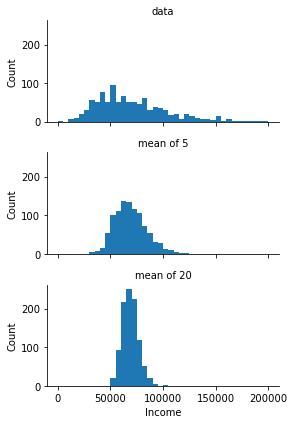

In [9]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

In [12]:
print(loans_income.x.mean())
print(sample_5.income.mean())
print(sample_20.income.mean())

68760.51844
68922.2884
68712.68685
